In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd



In [81]:
male = {}
all_data = pd.read_json("metadata.json")
male_data = pd.read_json("male_metadata.json")
female_data = pd.read_json("female_metadata.json")

# for col in df:
    # print(df[col].unique())

In [207]:
def combine_pathologies(df):
    data = [df[0],df[1:].sum()]
    labels = ["Healthy","Unhealthy"]
    return pd.DataFrame({'Label':labels,'Counts':data}).set_index('Label')

def merge_and_plot(dfs,logy=False,labels=True):
    combined = pd.concat(dfs, axis=1)

    ax=combined.plot.bar(figsize=(10,5),fontsize=12,logy=logy);
    plt.legend(['All Examples','$<0.96$','$\geq 0.96$ '],prop={'size': 10})
    if labels:
        for container in ax.containers:
            ax.bar_label(container)
    
def cut_off_df(df,to_df=False):
    short = df[df['length']<0.96]
    long = df[df['length']>=0.96]
    pathologies_full_count = df['pathology'].value_counts()
  
    pathologies_short_count = short['pathology'].value_counts()

    pathologies_remaining_count = long['pathology'].value_counts()
    if to_df:
        pathologies_full_count=pd.DataFrame({'pathology':pathologies_full_count.index, 'All Examples':pathologies_full_count.values})
        pathologies_short_count=pd.DataFrame({'pathology':pathologies_short_count.index, '<0.96':pathologies_short_count.values})
        pathologies_remaining_count=pd.DataFrame({'pathology':pathologies_remaining_count.index, '>=0.96':pathologies_remaining_count.values})
    return [pathologies_full_count, pathologies_short_count, pathologies_remaining_count]

    

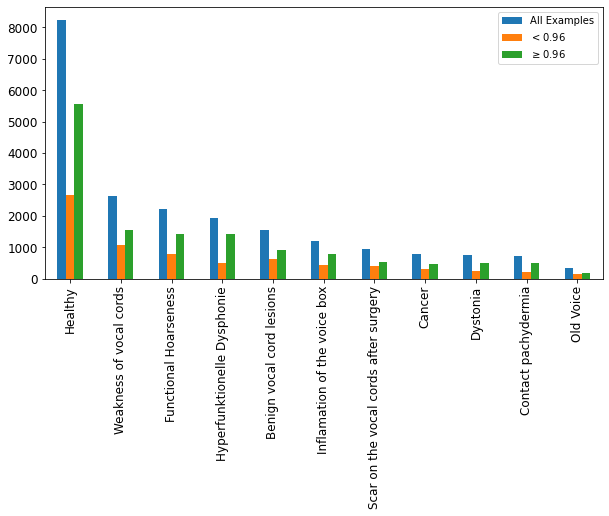

In [203]:
merge_and_plot(cut_off_df(all_data),labels=False)

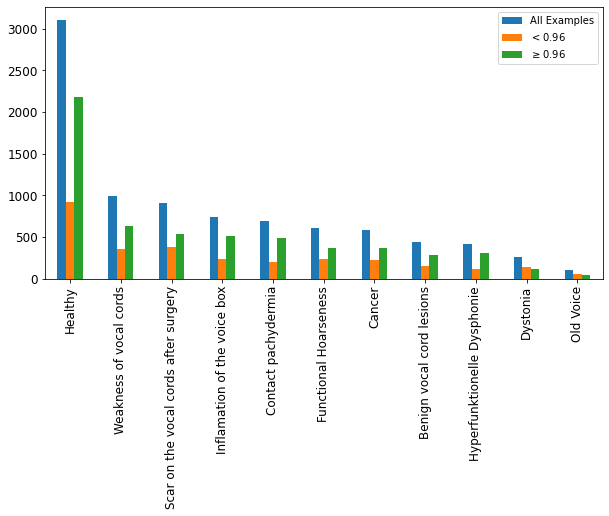

In [204]:
merge_and_plot(cut_off_df(male_data),labels=False)

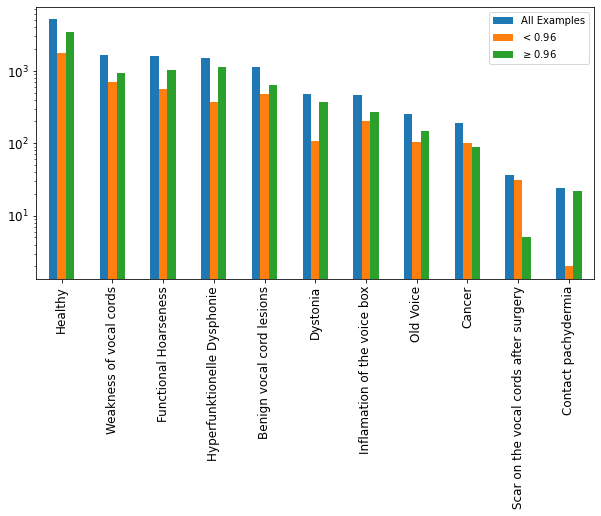

In [208]:
merge_and_plot(cut_off_df(female_data),labels=False,logy=True)

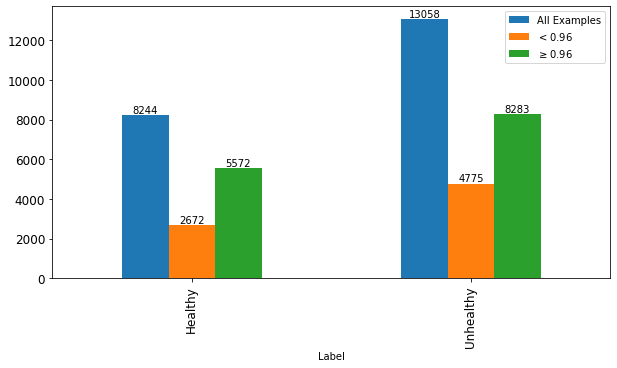

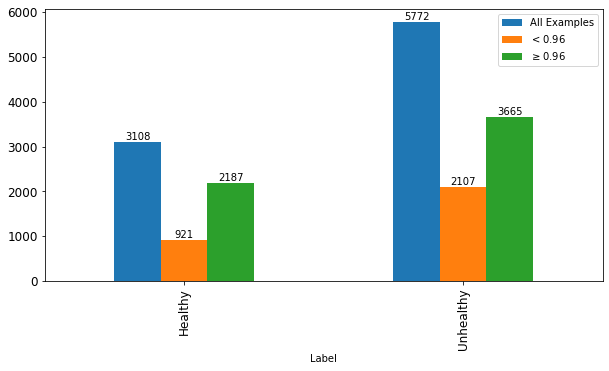

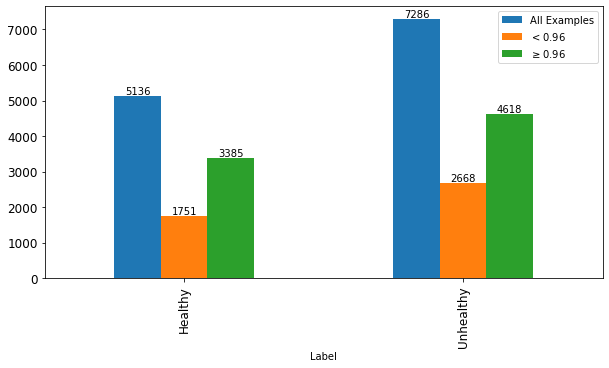

In [209]:
merge_and_plot([combine_pathologies(df_data) for df_data in cut_off_df(all_data)])
merge_and_plot([combine_pathologies(df_data) for df_data in cut_off_df(male_data)])
merge_and_plot([combine_pathologies(df_data) for df_data in cut_off_df(female_data)])

# merge_and_plot(combine_pathologies(cut_off_df(all_data)))
# cut_off_df(all_data)[0][0]
# pathologies_full_count=pd.DataFrame({'pathology':pathologies_full_count.index, 'All Examples':pathologies_full_count.values}).set_index('pathology')



In [78]:
short = df[df['length']<0.96]
long = df[df['length']>=0.96]

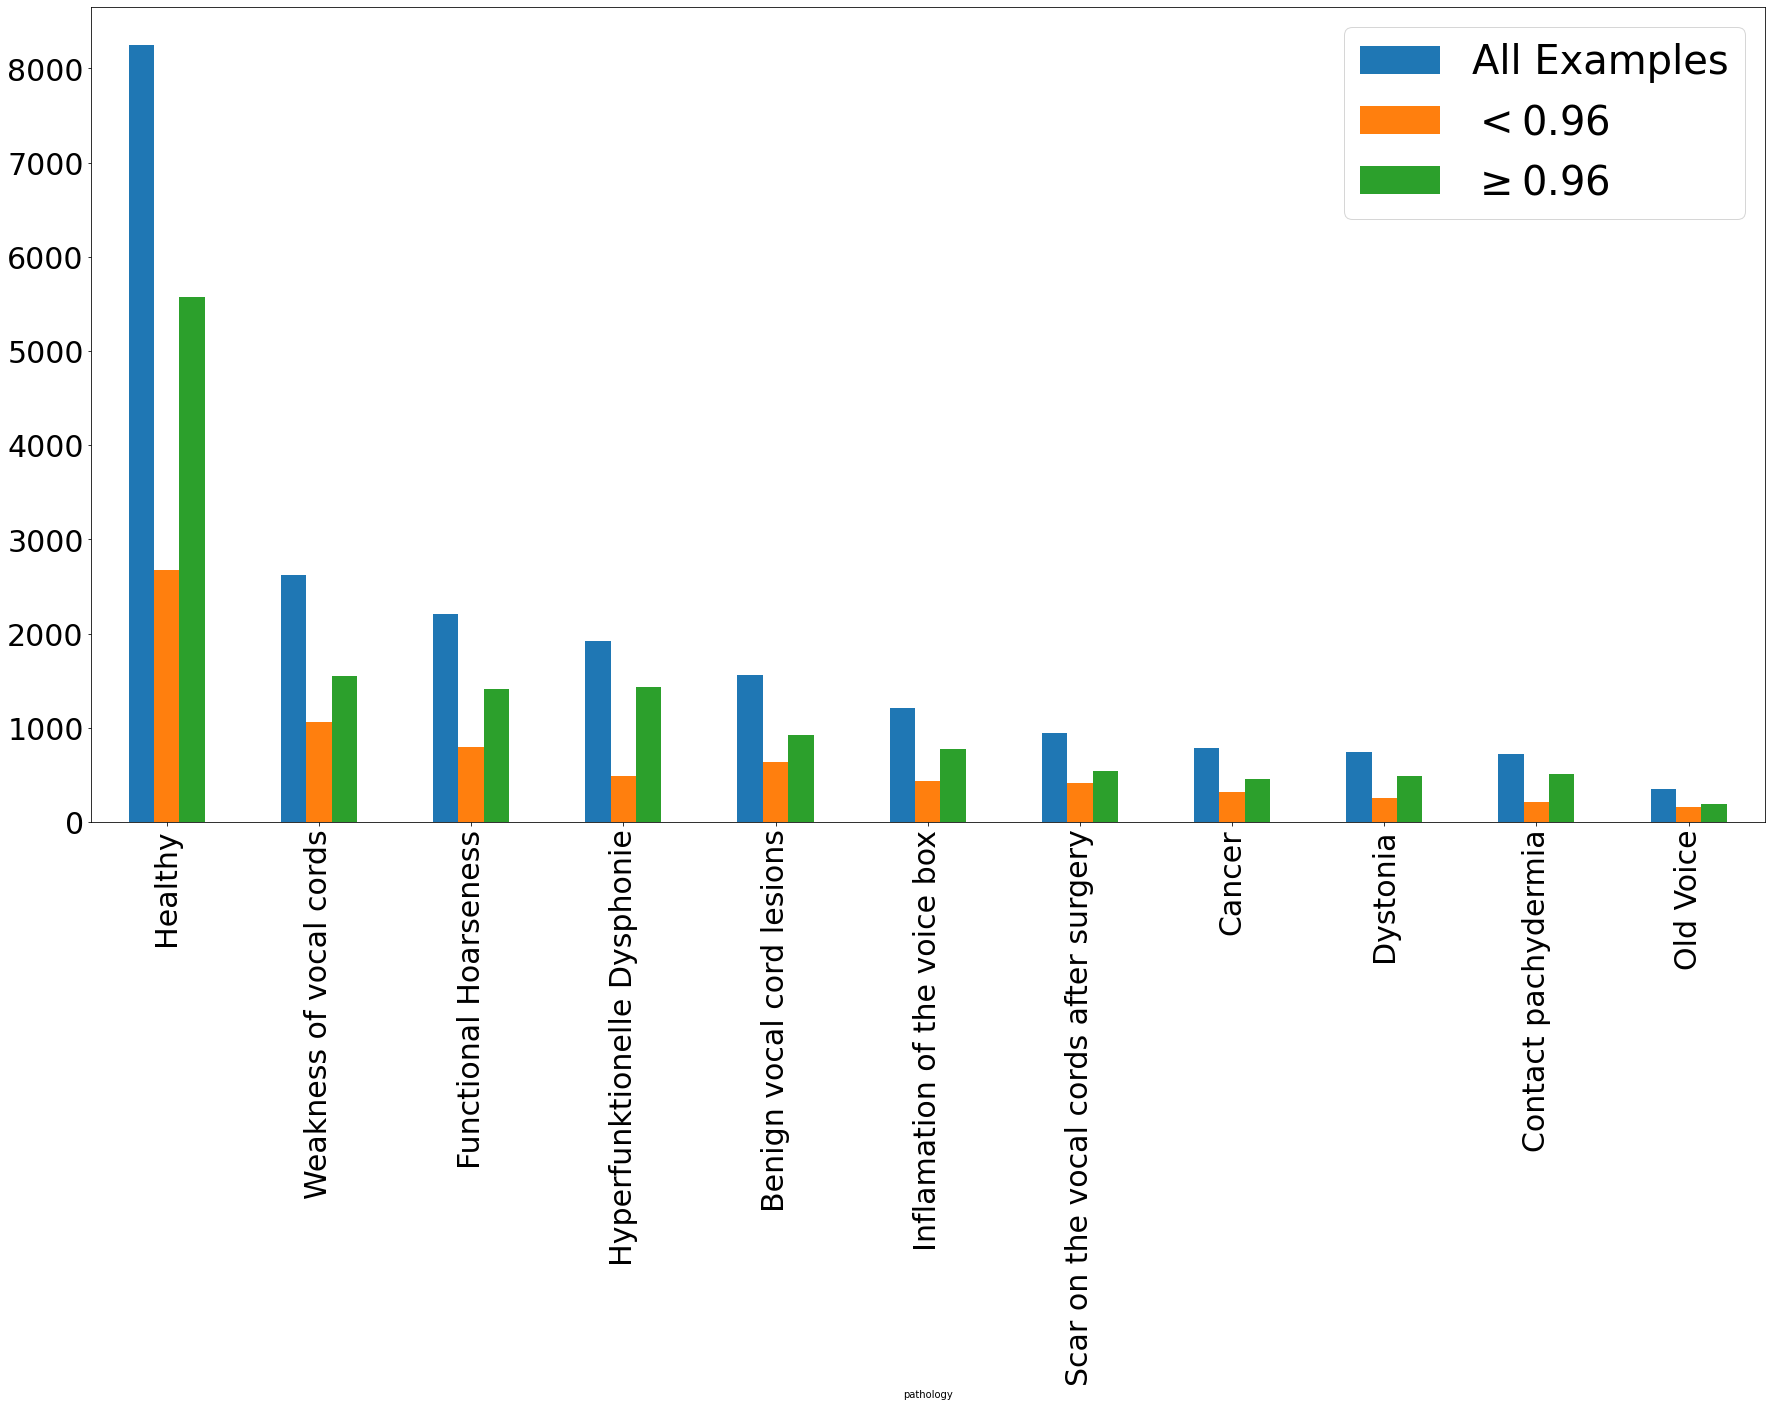

In [77]:
pathologies_full_count = df['pathology'].value_counts()
pathologies_full_count=pd.DataFrame({'pathology':pathologies_full_count.index, 'All Examples':pathologies_full_count.values}).set_index('pathology')

pathologies_short_count = short['pathology'].value_counts()
pathologies_short_count=pd.DataFrame({'pathology':pathologies_short_count.index, '<0.96':pathologies_short_count.values}).set_index('pathology')

pathologies_remaining_count = long['pathology'].value_counts()
pathologies_remaining_count=pd.DataFrame({'pathology':pathologies_remaining_count.index, '>=0.96':pathologies_remaining_count.values}).set_index('pathology')


combined = pd.concat([pathologies_full_count, pathologies_short_count, pathologies_remaining_count], axis=1)

combined.plot.bar(figsize=(30,15),fontsize=30);
plt.legend(['All Examples','$<0.96$','$\geq 0.96$ '],prop={'size': 40})

In [51]:
combined

,full_count,short_count,remaining_count
pathology,,,
Healthy,8244,2672,5572
Weakness of vocal cords,2619,1066,1553
Functional Hoarseness,2208,797,1411
Hyperfunktionelle Dysphonie,1919,487,1432
Benign vocal cord lesions,1560,639,921
Inflamation of the voice box,1212,435,777
Scar on the vocal cords after surgery,948,412,536
Cancer,780,321,459
Dystonia,744,252,492


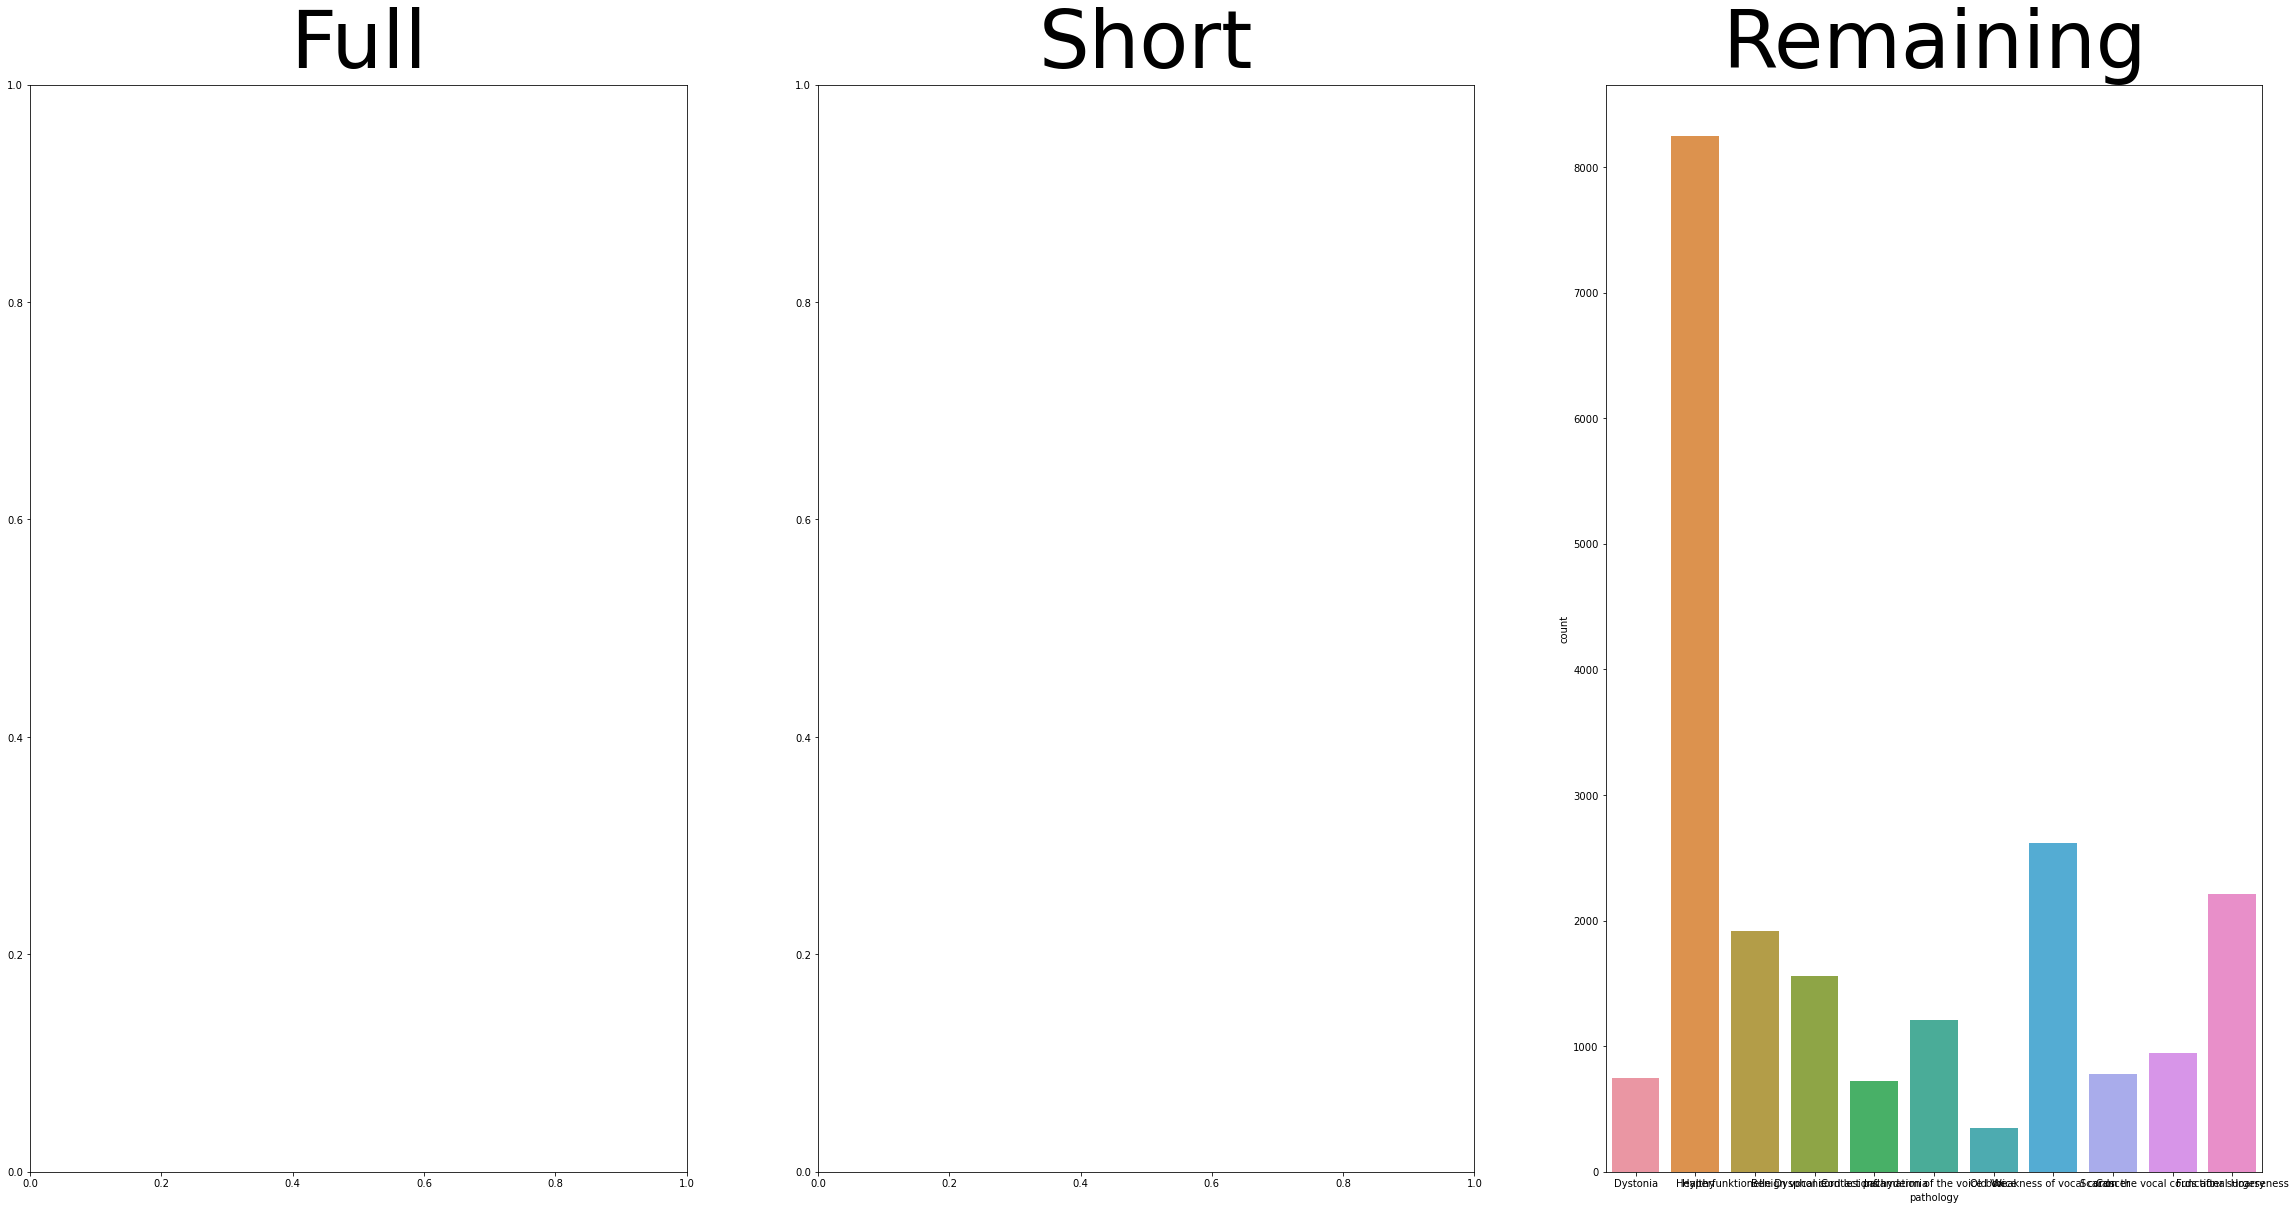

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(40,20))
axes[0].set_title('Full',fontsize=80)
axes[1].set_title('Short',fontsize=80)
axes[2].set_title('Remaining',fontsize=80)
ax = sns.countplot(x="pathology", data=df)

# df['pathology'].value_counts().plot.bar(ax=axes[0],autopct='%1.1f%%',subplots=True)
# short = df[df['length']<0.96]
# short['pathology'].value_counts().plot.bar(ax=axes[1],autopct='%1.1f%%',subplots=True)
# long = df[df['length']>=0.96]
# long['pathology'].value_counts().plot.bar(ax=axes[2],autopct='%1.1f%%',subplots=True);

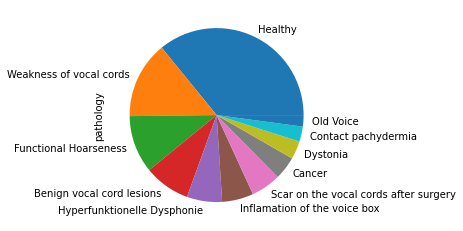

In [37]:
short = df[df['length']<0.96]
short['pathology'].value_counts().plot.pie();

<AxesSubplot:ylabel='pathology'>

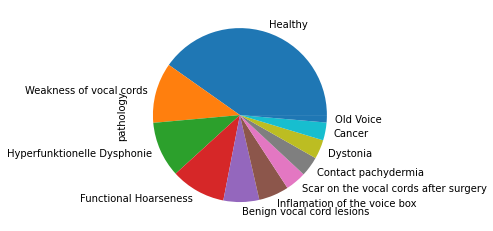

In [17]:
long = df[df['length']>=0.96]
long['pathology'].value_counts().plot.pie()

<AxesSubplot:ylabel='Frequency'>

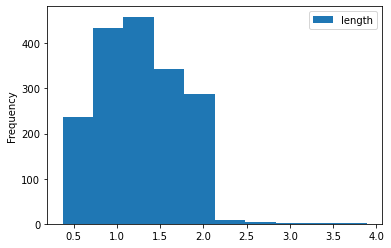

In [15]:
# df['bins']=pd.cut(df['length'],bins=[0,1,2,3,4,5], labels=["0<x<1","1<x<2","2<x<3","3<x<4","x>4"])
# df = df.groupby(['length', 'bins']).size().unstack(fill_value=0)

df[df['recording_type'].str.contains('u_n')].plot.hist(y='length')

In [5]:
df.plot.pie(y='length',figsize=(8, 3))

<AxesSubplot:ylabel='length'>

Error in callback <function flush_figures at 0x10baf1f70> (for post_execute):



KeyboardInterrupt



In [7]:
df.plot.hist(y='pathology',bins=100)



TypeError: no numeric data to plot